In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from scipy.stats import chi2
from statsmodels.sandbox.regression.gmm import IV2SLS
from statsmodels.stats.diagnostic import het_breuschpagan, het_white
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro, probplot
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
dataset = pd.read_csv("../datasets/utrechthousinglarge.csv", na_values=['NA'])
dataset

,id,zipcode,lot-len,lot-width,lot-area,house-area,garden-size,balcony,x-coor,y-coor,buildyear,bathrooms,taxvalue,retailvalue,energy-eff,monument
0,100966,3800,18.2,6.8,123.8,122.40,62.6,1,2816,5214,1948,1,589000,718000,0,1
1,101456,3528,12.6,9.6,121.0,129.60,9.6,0,2260,5365,1958,1,615000,835000,0,1
2,101953,3800,17.7,9.5,168.2,128.25,82.7,1,2766,5459,1963,1,648000,792000,0,1
3,103458,3525,12.6,8.1,102.1,109.35,29.2,1,2257,5868,2002,1,519000,599000,0,0
4,103768,3500,18.1,8.5,153.9,114.75,68.9,2,2811,5917,2011,1,582000,619000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,980487,3528,14.2,5.7,80.9,102.60,12.5,2,2415,5109,1939,1,475000,646000,0,1
396,981046,3528,12.2,5.8,70.8,130.50,5.8,0,2215,5268,1954,2,579000,773000,1,0
397,991299,3528,14.6,6.7,97.8,120.60,30.8,2,2456,5313,1954,1,561000,738000,0,1
398,991534,3800,16.5,8.5,140.3,191.25,63.8,1,2650,5359,1955,2,877000,1084000,1,1


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           400 non-null    int64  
 1   zipcode      400 non-null    int64  
 2   lot-len      400 non-null    float64
 3   lot-width    400 non-null    float64
 4   lot-area     400 non-null    float64
 5   house-area   400 non-null    float64
 6   garden-size  400 non-null    float64
 7   balcony      400 non-null    int64  
 8   x-coor       400 non-null    int64  
 9   y-coor       400 non-null    int64  
 10  buildyear    400 non-null    int64  
 11  bathrooms    400 non-null    int64  
 12  taxvalue     400 non-null    int64  
 13  retailvalue  400 non-null    int64  
 14  energy-eff   400 non-null    int64  
 15  monument     400 non-null    int64  
dtypes: float64(5), int64(11)
memory usage: 50.1 KB


In [4]:
dataset.isnull().sum()

id             0
zipcode        0
lot-len        0
lot-width      0
lot-area       0
house-area     0
garden-size    0
balcony        0
x-coor         0
y-coor         0
buildyear      0
bathrooms      0
taxvalue       0
retailvalue    0
energy-eff     0
monument       0
dtype: int64

In [5]:
dataset.describe()

,id,zipcode,lot-len,lot-width,lot-area,house-area,garden-size,balcony,x-coor,y-coor,buildyear,bathrooms,taxvalue,retailvalue,energy-eff,monument
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,4.000000e+02,4.000000e+02,400.000000,400.000000
mean,552049.482500,3607.735000,14.850500,7.702250,114.350000,137.376000,35.307250,1.182500,2484.335000,5484.767500,1968.987500,1.332500,6.409525e+05,7.785325e+05,0.517500,0.485000
std,250094.370309,130.910154,2.893541,1.639188,33.205548,40.133509,23.050523,0.682171,289.150589,288.804186,26.498259,0.471699,1.758158e+05,2.034148e+05,0.500319,0.500401
min,100966.000000,3500.000000,10.000000,5.000000,54.100000,67.500000,5.100000,0.000000,2001.000000,5000.000000,1920.000000,1.000000,3.190000e+05,4.270000e+05,0.000000,0.000000
25%,321123.000000,3525.000000,12.425000,6.500000,88.475000,111.937500,15.000000,1.000000,2241.750000,5242.250000,1948.000000,1.000000,5.215000e+05,6.335000e+05,0.000000,0.000000
50%,560999.500000,3528.000000,14.850000,7.700000,112.400000,130.050000,31.600000,1.000000,2484.500000,5484.500000,1969.000000,1.000000,6.120000e+05,7.515000e+05,1.000000,0.000000
75%,755517.500000,3800.000000,17.275000,8.800000,136.100000,158.737500,50.725000,2.000000,2726.000000,5726.750000,1992.000000,2.000000,7.390000e+05,8.932500e+05,1.000000,1.000000
max,993688.000000,3800.000000,19.700000,11.000000,215.600000,247.500000,116.600000,2.000000,2968.000000,5965.000000,2018.000000,2.000000,1.149000e+06,1.389000e+06,1.000000,1.000000


# Analysing Variables

## Correlation Matrix

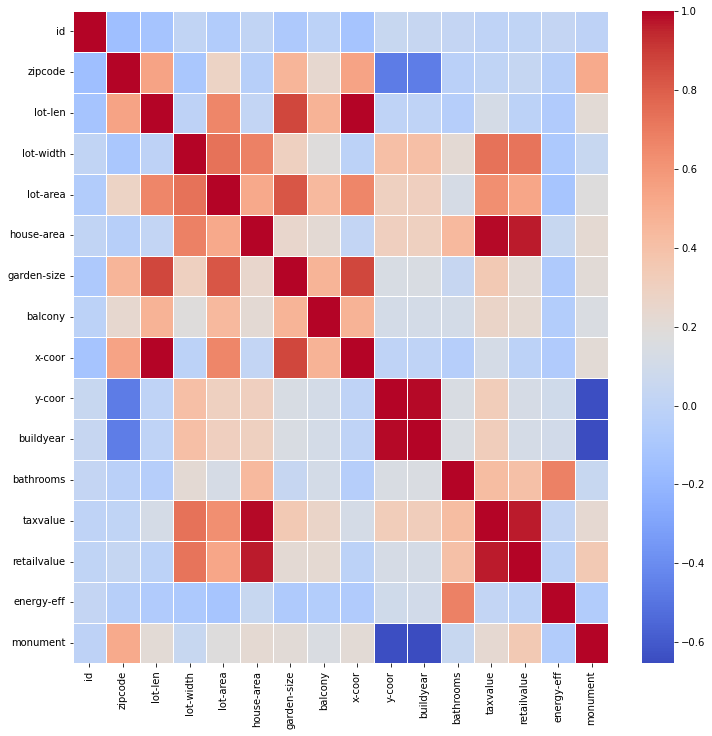

In [6]:
plt.figure(figsize = (12,12))
sns.heatmap(dataset.corr(), cmap='coolwarm', linecolor='white',linewidths=1)
plt.show()

## Correlation with "retailvalue"

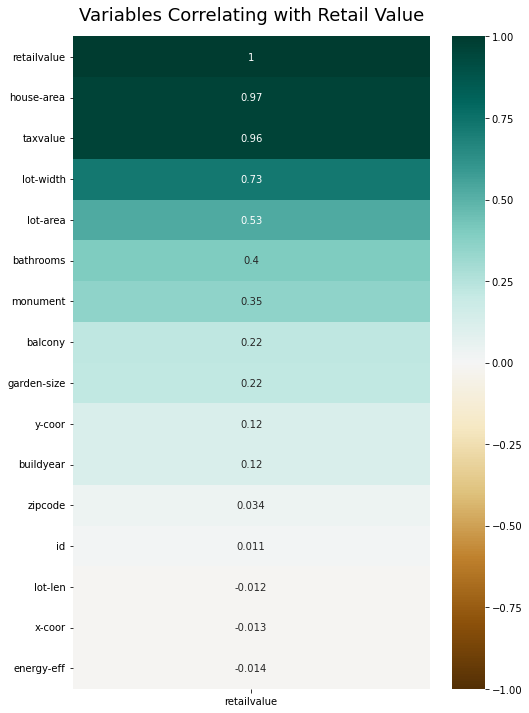

In [7]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(dataset.corr()[['retailvalue']].sort_values(by='retailvalue', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Variables Correlating with Retail Value', fontdict={'fontsize':18}, pad=16);

## Correlations of the variables that have a stronger correlation with ‘retailvalue’

In [8]:
corr_table = dataset[['house-area', 'lot-width', 'lot-area','bathrooms','monument']]

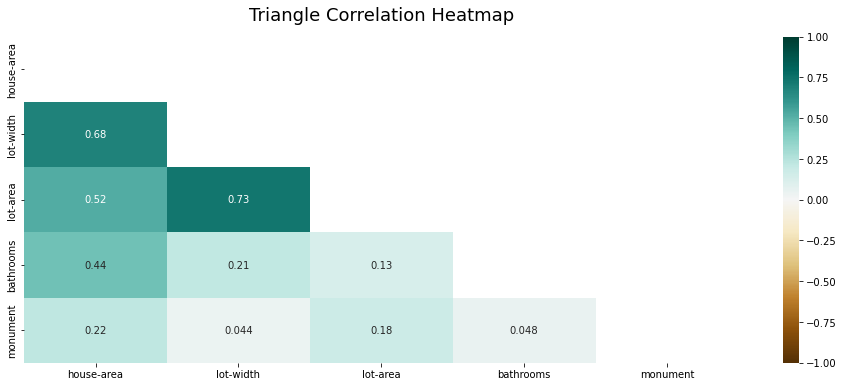

In [9]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(corr_table.corr(), dtype=np.bool_))
heatmap = sns.heatmap(corr_table.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

### Visualisation as a pairplot

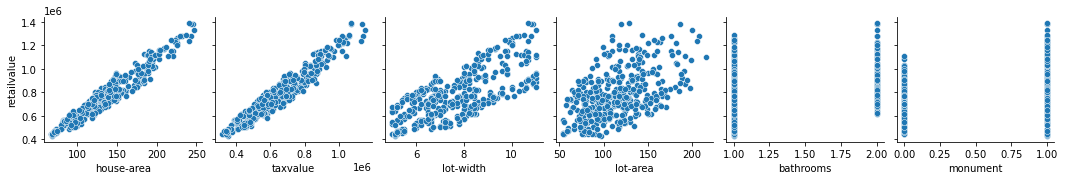

In [10]:
pp = sns.pairplot(data=dataset,
                  y_vars=['retailvalue'],
                  x_vars=['house-area', 'taxvalue', 'lot-width', 'lot-area','bathrooms','monument'])

# Requirements for an MLR

## Linearität 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


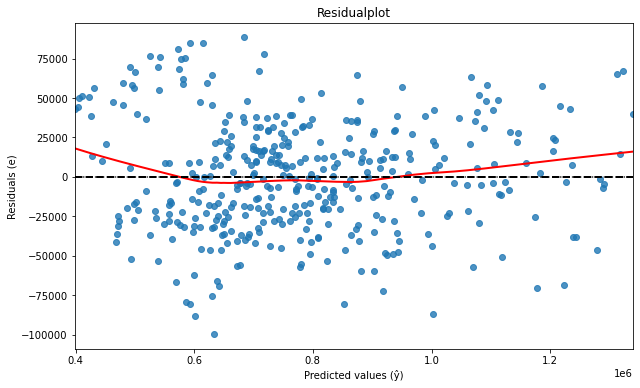

In [11]:
features = ['lot-width', 'lot-area', 'bathrooms', 'monument', 'house-area']
X = dataset[features]
y = dataset['retailvalue']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
dataset['fitted'] = model.fittedvalues
dataset['residuals'] = model.resid

# Residualplot
plt.figure(figsize=(10, 6))
sns.residplot(x='fitted', y='residuals', data=dataset, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.axhline(0, color='black', lw=2, linestyle='--')
plt.xlabel('Predicted values (ŷ)')
plt.ylabel('Residuals (e)')
plt.title('Residualplot')
plt.show()


## Exogeneity of the predictors

In [12]:
X = dataset[features]
Y = dataset['retailvalue']

Z = X.iloc[:, 0]

ols_model = sm.OLS(Y, sm.add_constant(X)).fit()

iv_model = IV2SLS(Y, sm.add_constant(X), instrument=Z).fit()

# Durbin-Wu-Hausman-Test
b_diff = ols_model.params - iv_model.params
b_diff_cov = ols_model.cov_params() - iv_model.cov_params()
stat = np.dot(np.dot(b_diff.T, np.linalg.inv(b_diff_cov)), b_diff)
p_value = chi2.sf(stat, len(b_diff) - 1)

print(f'Durbin-Wu-Hausman Test Statistic: {stat}')
print(f'p-value: {p_value}')


Durbin-Wu-Hausman Test Statistic: 1.4210854715202004e-13
p-value: 1.0


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## Homoscedasticity

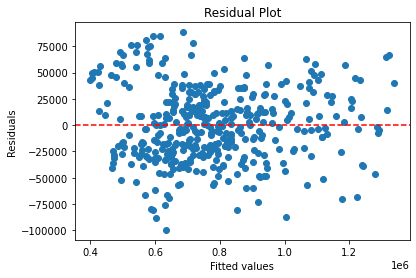

Breusch-Pagan-Test:
Test statistics: 48.2400638263226, p-Value: 3.1728688460730383e-09


In [13]:
X = dataset[features]
Y = dataset['retailvalue']

model = sm.OLS(Y, sm.add_constant(X)).fit()

# Residualsplot
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Breusch-Pagan-Test
bp_test = het_breuschpagan(model.resid, model.model.exog)
print('Breusch-Pagan-Test:')
print(f'Test statistics: {bp_test[0]}, p-Value: {bp_test[1]}')


                            OLS Regression Results                            
Dep. Variable:            retailvalue   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     2109.
Date:                Thu, 25 Jul 2024   Prob (F-statistic):          8.91e-282
Time:                        16:21:33   Log-Likelihood:                -4753.3
No. Observations:                 400   AIC:                             9519.
Df Residuals:                     394   BIC:                             9542.
Df Model:                           5                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.237e+04   1.01e+04      2.207      0.0

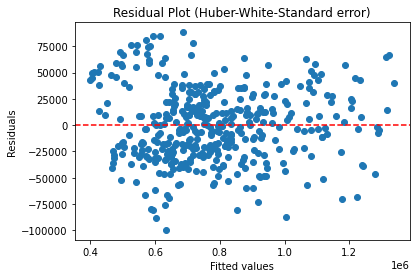

In [14]:
model_hc = sm.OLS(Y, sm.add_constant(X)).fit(cov_type='HC3')

# Ergebnisse des OLS-Modells mit Huber-White-Standardfehlern
print(model_hc.summary())

# Residualplot für das OLS-Modell mit Huber-White-Standardfehlern
plt.scatter(model_hc.fittedvalues, model_hc.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Huber-White-Standard error)')
plt.show()


## Independence of the residuals

Durbin-Watson-Statistics: 1.8288843737398903


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


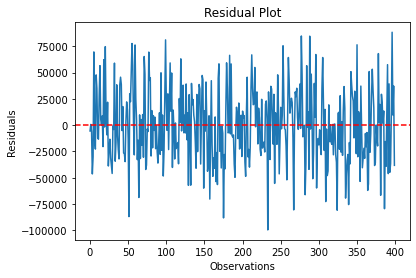

In [15]:
# OLS-Modell
model = sm.OLS(Y, sm.add_constant(X)).fit()

# Durbin-Watson-Test
dw_stat = durbin_watson(model.resid)
print(f'Durbin-Watson-Statistics: {dw_stat}')

plt.plot(model.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Observations')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## Multicollinearity

In [16]:
X_with_const = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data['Variable'] = X_with_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]
print("\nVariance Inflation Factor (VIF):")
print(vif_data)


Variance Inflation Factor (VIF):
     Variable        VIF
0       const  27.638658
1   lot-width   3.144450
2    lot-area   2.258604
3   bathrooms   1.277324
4    monument   1.127677
5  house-area   2.433082


# Linear regression models

## Variablen: house area 

In [17]:
df1 = dataset[['retailvalue', 'house-area']]

In [18]:
X = df1['house-area']
y = df1['retailvalue']

<function matplotlib.pyplot.show(close=None, block=None)>

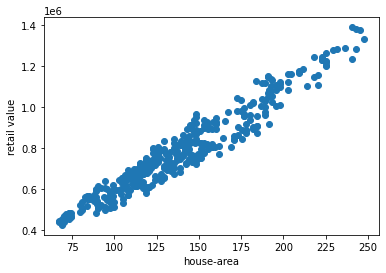

In [19]:
plt.scatter(X, y)
plt.xlabel("house-area")
plt.ylabel("retail value")
plt.show

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [21]:
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)

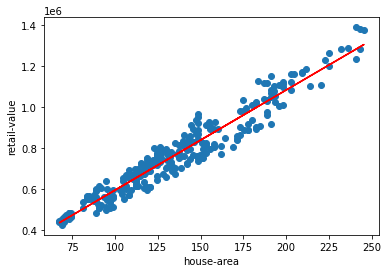

R2 Score: 0.9325243114601178


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

LR = LinearRegression()

LR.fit(X_train, y_train)
y_pred_train = LR.predict(X_train)

plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred_train, color='red')
plt.xlabel("house-area")
plt.ylabel("retail-value")
plt.show()

r2_score(y_train, y_pred_train)

print("R2 Score:", r2_score(y_train, y_pred_train))


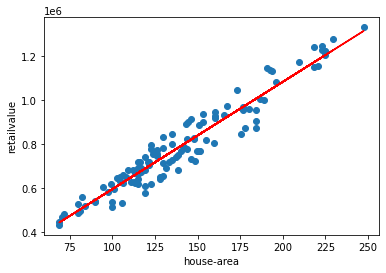

R2 Score: 0.930469382435071


In [23]:
#Modelltest mit Test-Daten


y_pred_test = LR.predict(X_test)

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred_test, color='red')
plt.xlabel("house-area")
plt.ylabel("retailvalue")
plt.show()

print("R2 Score:", r2_score(y_test, y_pred_test))

## Variables: house_area and lot-area

In [24]:
df2 = dataset[['retailvalue', 'house-area',"lot-area"]]
df2

,retailvalue,house-area,lot-area
0,718000,122.40,123.8
1,835000,129.60,121.0
2,792000,128.25,168.2
3,599000,109.35,102.1
4,619000,114.75,153.9
...,...,...,...
395,646000,102.60,80.9
396,773000,130.50,70.8
397,738000,120.60,97.8
398,1084000,191.25,140.3


In [25]:
X1 = dataset[['house-area',"lot-area"]]
y1 = dataset['retailvalue']
X1

,house-area,lot-area
0,122.40,123.8
1,129.60,121.0
2,128.25,168.2
3,109.35,102.1
4,114.75,153.9
...,...,...
395,102.60,80.9
396,130.50,70.8
397,120.60,97.8
398,191.25,140.3


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.3, random_state = 0)

In [27]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred_train = LR.predict(X_train)


LR.fit(X_train, y_train)

LinearRegression()

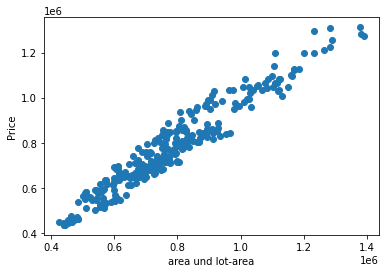

R2 Score: 0.9340279952747015


In [28]:
plt.scatter(y_train, y_pred_train)
plt.xlabel("area und lot-area")
plt.ylabel("Price")
plt.show()

r2_score(y_train, y_pred_train)
print("R2 Score:", r2_score(y_train, y_pred_train))

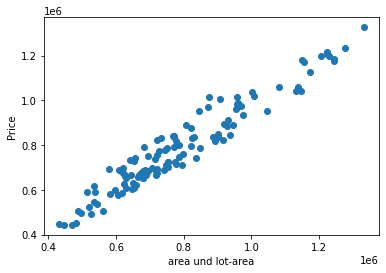

R2 Score: 0.9304839310170844


In [29]:
y_pred_test = LR.predict(X_test)

plt.scatter(y_test, y_pred_test)
plt.xlabel("area und lot-area")
plt.ylabel("Price")
plt.show()

print("R2 Score:", r2_score(y_test, y_pred_test))

## Variables: house_area, lot-area, bathrooms, monument

In [30]:
X2 = dataset[['house-area',"bathrooms","lot-area", 'monument']]
y2 = dataset['retailvalue']
X2

,house-area,bathrooms,lot-area,monument
0,122.40,1,123.8,1
1,129.60,1,121.0,1
2,128.25,1,168.2,1
3,109.35,1,102.1,0
4,114.75,1,153.9,0
...,...,...,...,...
395,102.60,1,80.9,1
396,130.50,2,70.8,0
397,120.60,1,97.8,1
398,191.25,2,140.3,1


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.3, random_state = 0)


In [32]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred_train = LR.predict(X_train)


LR.fit(X_train, y_train)

LinearRegression()

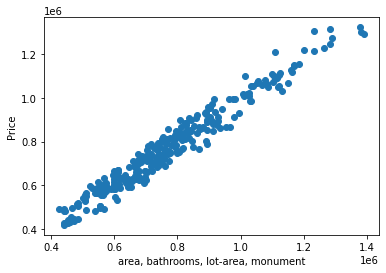

R2 Score: 0.9565545934976698


In [33]:
plt.scatter(y_train, y_pred_train)

plt.xlabel("area, bathrooms, lot-area, monument")
plt.ylabel("Price")
plt.show()

r2_score(y_train, y_pred_train)
print("R2 Score:", r2_score(y_train, y_pred_train))

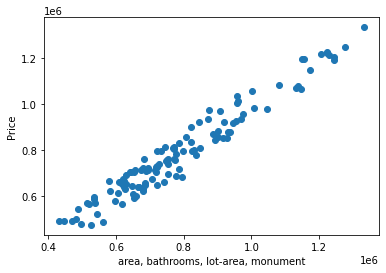

R2 Score: 0.9462629589197196


In [34]:
y_pred_test = LR.predict(X_test)

plt.scatter(y_test, y_pred_test)
plt.xlabel("area, bathrooms, lot-area, monument")
plt.ylabel("Price")
plt.show()

print("R2 Score:", r2_score(y_test, y_pred_test))

In [35]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_train))

Mean Absolute Error: 35098.91859272792


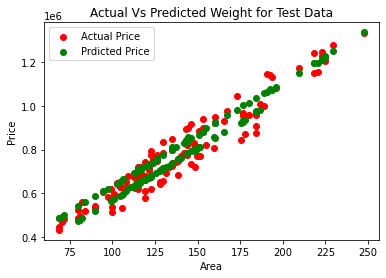

In [36]:
plt.scatter(X_test['house-area'], y_test, color='red', label = 'Actual Price')
plt.scatter(X_test['house-area'], LR.predict(X_test), color='green', label = 'Prdicted Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title('Actual Vs Predicted Weight for Test Data')
plt.legend()
plt.show()

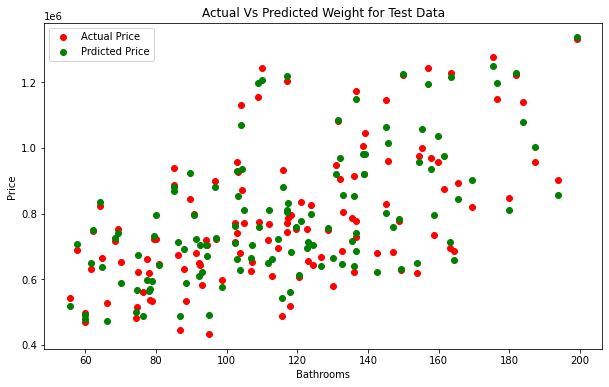

In [37]:
plt.scatter(X_test['lot-area'], y_test, color='red', label = 'Actual Price')
plt.scatter(X_test['lot-area'], LR.predict(X_test), color='green', label = 'Prdicted Price')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title('Actual Vs Predicted Weight for Test Data')
plt.legend()
plt.show()

### Calculation of the regression coefficients

In [38]:
pd.DataFrame(zip(X2.columns, LR.coef_))

,0,1
0,house-area,4651.428122
1,bathrooms,-27.838687
2,lot-area,153.272483
3,monument,62687.394580


### Calculation of the error term

In [39]:
print(LR.intercept_)

92177.33782677643


## Further analyses
### Variablen: house_area, lot_area and bathrooms

In [40]:
X3 = dataset[['house-area',"lot-area",'bathrooms']]
y3 = dataset['retailvalue']
X3

,house-area,lot-area,bathrooms
0,122.40,123.8,1
1,129.60,121.0,1
2,128.25,168.2,1
3,109.35,102.1,1
4,114.75,153.9,1
...,...,...,...
395,102.60,80.9,1
396,130.50,70.8,2
397,120.60,97.8,1
398,191.25,140.3,2


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size = 0.3, random_state = 0)

In [42]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred_train = LR.predict(X_train)


LR.fit(X_train, y_train)

LinearRegression()

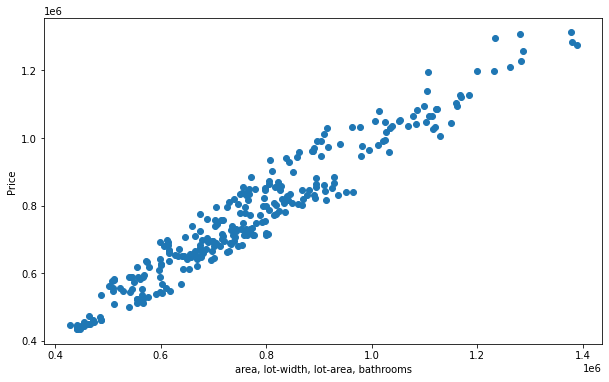

R2 Score: 0.9340298214844027


In [43]:
plt.scatter(y_train, y_pred_train)
plt.xlabel("area, lot-width, lot-area, bathrooms")
plt.ylabel("Price")
plt.show()

r2_score(y_train, y_pred_train)
print("R2 Score:", r2_score(y_train, y_pred_train))

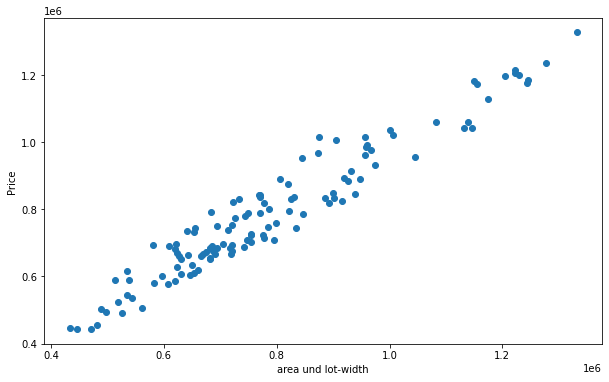

R2 Score: 0.9306653699800377


In [44]:
y_pred_test = LR.predict(X_test)

plt.scatter(y_test, y_pred_test)
plt.xlabel("area und lot-width")
plt.ylabel("Price")
plt.show()

print("R2 Score:", r2_score(y_test, y_pred_test))

### Variables: monument, bathrooms, house_area

In [45]:
X4 = dataset[['house-area','bathrooms', 'monument']]
y4 = dataset['retailvalue']
X4

,house-area,bathrooms,monument
0,122.40,1,1
1,129.60,1,1
2,128.25,1,1
3,109.35,1,0
4,114.75,1,0
...,...,...,...
395,102.60,1,1
396,130.50,2,0
397,120.60,1,1
398,191.25,2,1


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X4, y4, test_size = 0.3, random_state = 0)

In [47]:
LR.fit(X_train, y_train)

LinearRegression()

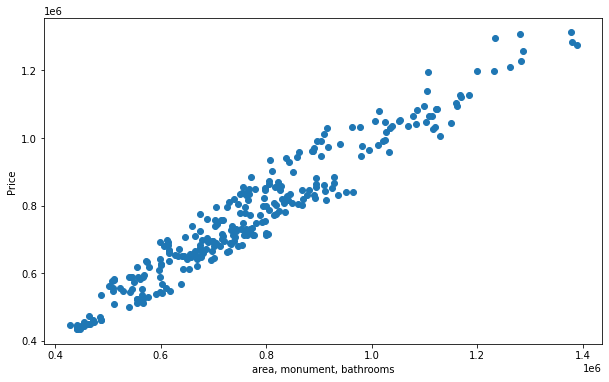

R2 Score: 0.9340298214844027


In [48]:
plt.scatter(y_train, y_pred_train)
plt.xlabel("area, monument, bathrooms")
plt.ylabel("Price")
plt.show()

r2_score(y_train, y_pred_train)
print("R2 Score:", r2_score(y_train, y_pred_train))

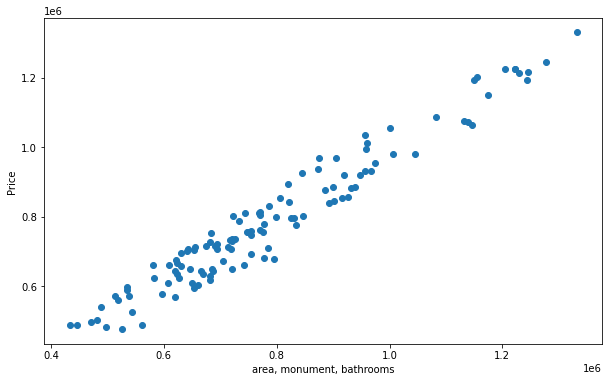

R2 Score: 0.9459813423392369


In [49]:
y_pred_test = LR.predict(X_test)

plt.scatter(y_test, y_pred_test)
plt.xlabel("area, monument, bathrooms")
plt.ylabel("Price")
plt.show()

print("R2 Score:", r2_score(y_test, y_pred_test))